# Boston House Prices 
## About the Dataset
We will be working on a data set that comes from the real estate industry in Boston (US). This database contains 14 attributes. The target variable refers to the median value of owner-occupied homes in 1000 USD's.

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 USD
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: lower status of the population (%)
* MEDV: Median value of owner-occupied homes in 1000 USD's (Target)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential    
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from Model import train

## Loading Data

In [3]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'PRICE']

In [4]:
data = pd.read_csv("/content/housing.csv", delim_whitespace=True, header=None)
data.columns = columns
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Data preparation

In [7]:
# Here we will split data into X and y
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [11]:
#Use the function train_test_split( ) to split our data into two sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print('Train data:', X_train.shape)
print('Test data:', X_test.shape)

Train data: (354, 13)
Test data: (152, 13)


In [13]:
def plot_model_hist(hist, feat='loss', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.plot(hist.index, hist[f'{feat}'], label='train')
    plt.plot(hist.index, hist[f'val_{feat}'], label='valid')
    plt.xlabel('epoch')
    plt.ylabel(feat)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
model=train(X_train, y_train, 50)

Epoch 1/50
9/9 [==============================] - 1s 22ms/step - loss: 6922.8599 - val_loss: 4697.0156
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 4058.2168 - val_loss: 2646.8643
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 2340.2920 - val_loss: 1473.8181
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 1454.2880 - val_loss: 973.7189
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 999.9565 - val_loss: 566.4671
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 579.7256 - val_loss: 307.8445
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 390.3312 - val_loss: 242.7455
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 331.5504 - val_loss: 205.1691
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 268.1642 - val_loss: 162.5028
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 209.6764 - val_loss: 

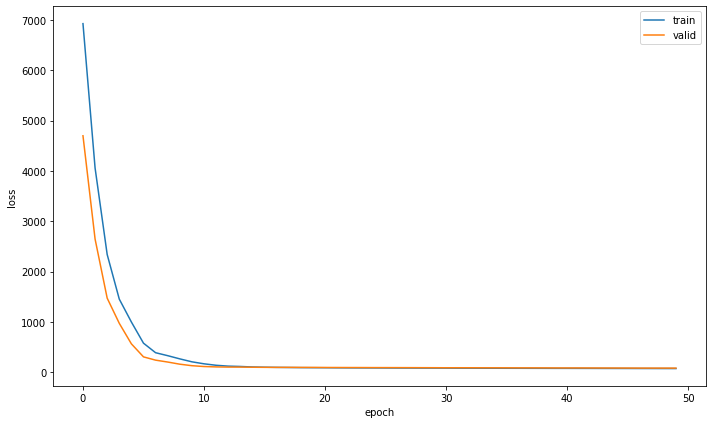

In [15]:
model_hist = pd.DataFrame(model.history.history)
plot_model_hist(model_hist)

In [16]:
print('MSE (train):', model.evaluate(X_train, y_train),
      '\nMSE (test):', model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 60.4411
MSE (train): 77.3003921508789 
MSE (test): 60.441123962402344


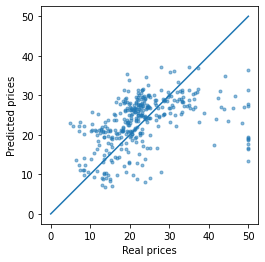

In [17]:
plt.scatter(y_train, model.predict(X_train), marker='.', alpha=0.5)
plt.plot([0,50],[0,50])
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.gca().set_aspect('equal')

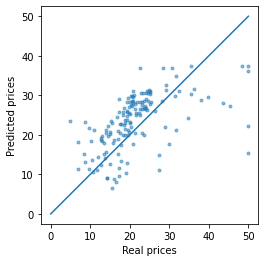

In [18]:
plt.scatter(y_test, model.predict(X_test), marker='.', alpha=0.5)
plt.plot([0,50],[0,50])
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.gca().set_aspect('equal')

# **Explainable AI with Shapley values**


<br>
<br>

### Shapley values are a widely used approach from cooperative game theory that come with desirable properties. This tutorial is designed to help build a basic understanding of how to compute and interpet Shapley-based explanations on deep learning model using the shap Python package.

### SHAP can be installed from either PyPI or conda-forge:
### pip install shap
### or
### conda install -c conda-forge shap

In [19]:
!pip install shap

     |████████████████████████████████| 371 kB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509245 sha256=fe1756e77bf109a885c5d26bc793f11c6f9f1a4500b22913243d859d97d63dc1
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [20]:
import shap
shap.initjs()

### In this example we will explore KernelExplainer. The KernelExplainer builds a weighted linear regression by using your data, your predictions, and whatever function that predicts the predicted values. It computes the variable importance values based on the Shapley values from game theory, and the coefficients from a local linear regression.

In [21]:
#fix seed for reproducibility
np.random.seed(123)
# KernelExplainer is a general approach that can work with any ML framework
# Its inputs are the predictions and training data

# Summarize the training set to accelerate analysis
df_train_normed_summary = shap.kmeans(X_train.values, 25)

# Instantiate an explainer with the model predictions and training data summary
explainer = shap.KernelExplainer(model.predict, df_train_normed_summary)

# Extract Shapley values from the explainer
shap_values = explainer.shap_values(X_train.values)

  0%|          | 0/354 [00:00<?, ?it/s]

## **SHAP summary plot**

#### To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. 
#### The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output.
#### The color represents the feature value (red high, blue low). 

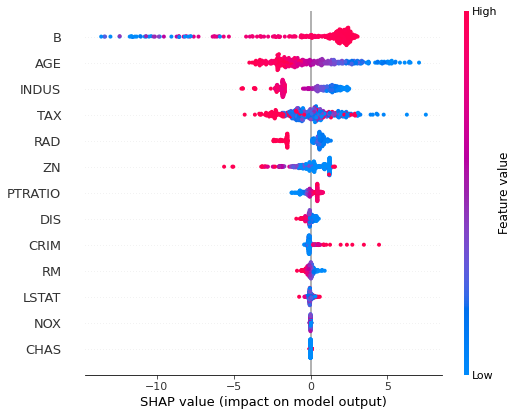

In [22]:
# Summarize the Shapley values in a plot
shap.summary_plot(shap_values[0], X_train)

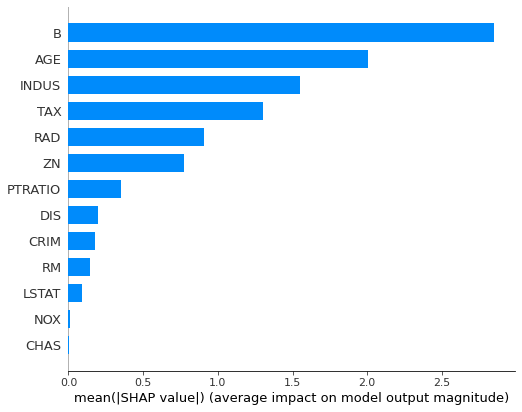

In [23]:
shap.summary_plot(shap_values[0], X_train,plot_type='bar')

In [25]:
shap_expl=shap.Explanation(shap_values[0], explainer.expected_value[0],feature_names=X_train.columns)

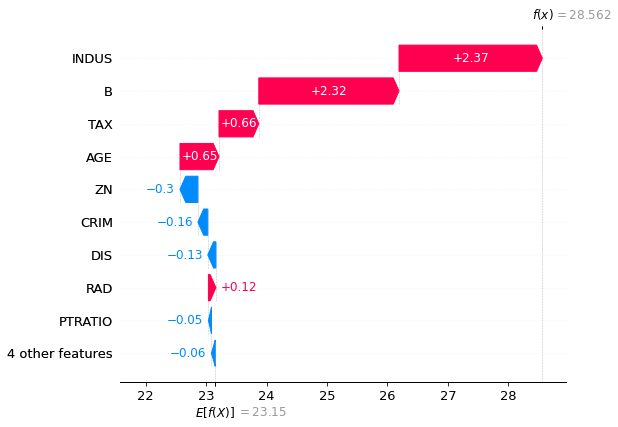

In [26]:
shap.plots.waterfall(shap_expl[0])

In [34]:
# Plot the SHAP values for one instance
shap.initjs() 
INSTANCE_NUM = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][INSTANCE_NUM], X_train.iloc[INSTANCE_NUM,:])

#### 0.29 is the predicted value. The base value is the average value of the target variable across all the records. Each stripe shows the impact of its features in pushing the base value. Red stripes show that their features push the value towards higher values. Blue stripes show that their features push the value towards lower values. The wider a stripe, the higher (in absolute value) the contribution. The sum of these contributions pushes the value of the target variable from the vase value to the final, predicted value.

#### As we can see, for this particular record TAX and B are values have a positive contribution to the predicted value. B is still the most important variable of this record, because its contribution is the widest one (it has the largest stripe). The  variables that show a negative contribution are AGE and INDUS Are not strong enough to move the predicted value lower than the base value. So, since the total positive contribution (red stripes) is larger than the negative contribution (blue stripe), the final value is greater than the base value. 

## **SHAP force plot**

In [35]:
# Plot the SHAP values for multiple instances
shap.initjs() 
NUM_ROWS = 10
shap.force_plot(explainer.expected_value[0], shap_values[0][0:NUM_ROWS], X_train.iloc[0:NUM_ROWS])

## **SHAP dependence plot**


 ### A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model.If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.
### Each dot is a single prediction (row) from the dataset.
### The x-axis is the value of the feature (from the X matrix).
### The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction.

  

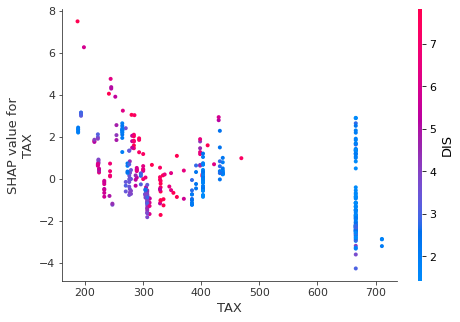

In [30]:
# Create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('TAX', shap_values[0], X_train, interaction_index='DIS')

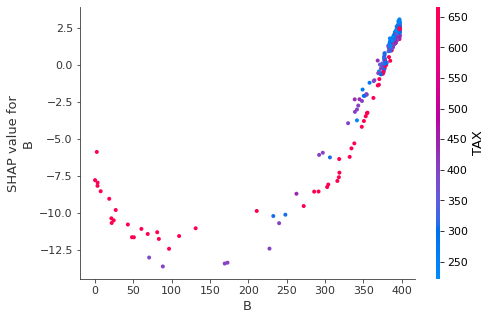

In [31]:
# Create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('B', shap_values[0], X_train, interaction_index='TAX')

## **SHAP decision plot**

###  As like the summary plot, it gives an overall picture of contribution to prediction. From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values.

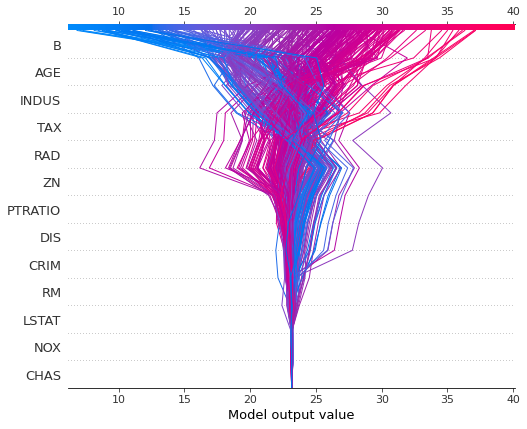

In [32]:
# decision plot for one instance
#shap_expl=shap.Explanation(shap_values[0], explainer.expected_value[0],feature_names=X_train.columns)
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names=list(X_train.columns))

In [33]:
#Get feature importance from SHAP 
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
126,None,"[4.457551830760514, 1.0752715936930284, 2.1872..."
138,None,"[3.4716747021441052, 1.0871046084301836, 1.911..."
282,None,"[2.7202463910250394, 0.8748436728789426, 2.257..."
7,DIS,"[2.3678378918905856, 1.1790027964539274, 1.969..."
329,None,"[1.9604207338793933, 0.8856687137082275, 1.854..."
...,...,...
63,None,"[0.01041313118794518, 0.9357901811187124, 2.00..."
26,None,"[0.008614012322492037, 1.846475888769413, 1.74..."
271,None,"[0.00693110274861386, 1.2320355209867575, 1.77..."
223,None,"[0.005399731626673621, 1.2375464333401829, 1.7..."


# Conclusion

#### Shapley values provide a uniform approach to decompose a model’s predictions into contributions that can be attributed additively to different explanatory variables. It is a method originally invented for assigning payouts to players depending on their contribution towards the total payout. In the explanation setting, the features are the players and the prediction is the total payout. In this framework, the difference between the prediction and the average prediction is perfectly distributed among the features.  Lundberg and Lee (2017) showed that the method unifies different approaches to additive variable attributions, like DeepLIFT (Shrikumar, Greenside, and Kundaje 2017), Layer-Wise Relevance Propagation (Binder et al. 2016), or Local Interpretable Model-agnostic Explanations (Ribeiro, Singh, and Guestrin 2016). The method has got a strong formal foundation derived from the cooperative games theory. It also enjoys an efficient implementation in Python, with ports or re-implementations in R.

#### An important drawback of Shapley values is that they provide additive contributions (attributions) of explanatory variables. If the model is not additive, then the Shapley values may be misleading. This issue can be seen as arising from the fact that, in cooperative games, the goal is to distribute the payoff among payers. However, in the predictive modelling context, we want to understand how do the players affect the payoff? Thus, we are not limited to independent payoff-splits for players.

# Future work

#### Comparison of Interpretability Methods to Explain Deep Learning Models on Boston prices/MNIST/other data
#### Can SHAP be applied to a super learner ensemble method?



# Citation

#### Github repo: https://github.com/slundberg/shap
#### A Unified Approach to Interpreting Model Predictions: https://arxiv.org/pdf/1705.07874v2.pdf
#### https://towardsdatascience.com/a-novel-approach-to-feature-importance-shapley-additive-explanations-d18af30fc21b#5280
#### https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html
#### https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
#### Shapley Additive Explanations (SHAP) for Average Attributions: https://ema.drwhy.ai/shapley.html
#### https://christophm.github.io/interpretable-ml-book/
#### Aas, Kjersti et al. “Explaining individual predictions when features are dependent: More accurate approximations to Shapley values.” Artif. Intell. 298 (2021): 103502.